<a href="https://colab.research.google.com/github/nelsonbeas33/procesamiento-datos/blob/main/tarea1/tarea1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# Importar bibliotecas necesarias
import pandas as pd
import re
from collections import Counter
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Cargar el archivo CSV
ruta_archivo = '/content/drive/MyDrive/procesamiento de datos/products.csv'  # Ruta específica
datos = pd.read_csv(ruta_archivo)

# Mostrar las primeras filas del archivo
print("Datos originales:")
print(datos.head())

# 1. Preprocesamiento
def preprocesar_texto(texto):
    # Convertir a minúsculas
    texto = texto.lower()
    # Eliminar caracteres especiales y números
    texto = re.sub(r'[^a-zA-Z\s]', '', texto)
    return texto

# Agregar una nueva columna con el texto preprocesado
datos['product_name_clean'] = datos['product_name'].apply(preprocesar_texto)

Datos originales:
   product_id                                       product_name  aisle_id  \
0           1                         Chocolate Sandwich Cookies        61   
1           2                                   All-Seasons Salt       104   
2           3               Robust Golden Unsweetened Oolong Tea        94   
3           4  Smart Ones Classic Favorites Mini Rigatoni Wit...        38   
4           5                          Green Chile Anytime Sauce         5   

   department_id  
0             19  
1             13  
2              7  
3              1  
4             13  


In [5]:
# 2. Tokenización
def tokenizar(texto):
    return texto.split()

datos['tokens'] = datos['product_name_clean'].apply(tokenizar)

In [6]:
# 3. Eliminación de palabras vacías (conectores, artículos, preposiciones, etc.)
palabras_vacias = set([
    'and', 'the', 'of', 'in', 'to', 'for', 'with', 'on', 'at', 'by', 'an', 'a',  # Inglés
    'y', 'de', 'en', 'a', 'por', 'con', 'para', 'sin', 'sobre', 'entre', 'hacia'  # Español
])

def eliminar_palabras_vacias(tokens):
    return [token for token in tokens if token not in palabras_vacias]

# Agregar una nueva columna con los tokens filtrados
datos['tokens_filtrados'] = datos['tokens'].apply(eliminar_palabras_vacias)

In [8]:
 #4. Análisis estadístico
# Frecuencia de palabras
todas_las_palabras = [token for sublist in datos['tokens_filtrados'] for token in sublist]
frecuencia_palabras = Counter(todas_las_palabras)

# Bigramas
from nltk import bigrams
bigramas = list(bigrams(todas_las_palabras))
frecuencia_bigramas = Counter(bigramas)

# Trigramas
from nltk import trigrams
trigramas = list(trigrams(todas_las_palabras))
frecuencia_trigramas = Counter(trigramas)

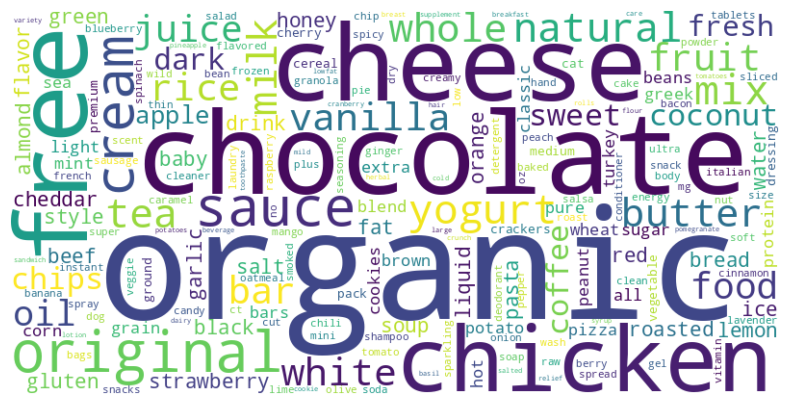

Palabras más comunes:
[('organic', 5027), ('chocolate', 2440), ('cheese', 2088), ('free', 1875), ('chicken', 1529), ('original', 1449), ('sauce', 1290), ('cream', 1278), ('yogurt', 1161), ('mix', 1143)]

Bigramas más comunes:
[(('gluten', 'free'), 707), (('ice', 'cream'), 558), (('dark', 'chocolate'), 539), (('peanut', 'butter'), 443), (('sea', 'salt'), 410), (('cat', 'food'), 324), (('all', 'natural'), 302), (('greek', 'yogurt'), 293), (('chocolate', 'chip'), 291), (('olive', 'oil'), 282)]

Trigramas más comunes:
[(('liquid', 'laundry', 'detergent'), 90), (('extra', 'virgin', 'olive'), 86), (('virgin', 'olive', 'oil'), 86), (('no', 'salt', 'added'), 74), (('chocolate', 'peanut', 'butter'), 62), (('roast', 'ground', 'coffee'), 61), (('no', 'sugar', 'added'), 58), (('ice', 'cream', 'bars'), 55), (('dark', 'chocolate', 'bar'), 54), (('whole', 'bean', 'coffee'), 53)]

Datos con columnas adicionales:
   product_id                                       product_name  aisle_id  \
0           

In [9]:
# 5. Visualización
# Nube de palabras
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(frecuencia_palabras)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

# Tabla resumen de frecuencias
print("Palabras más comunes:")
print(frecuencia_palabras.most_common(10))

print("\nBigramas más comunes:")
print(frecuencia_bigramas.most_common(10))

print("\nTrigramas más comunes:")
print(frecuencia_trigramas.most_common(10))

# Mostrar el DataFrame con las nuevas columnas
print("\nDatos con columnas adicionales:")
print(datos.head())

<ipython-input-11-ad1999891c34>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(palabras), y=list(frecuencias), palette='Blues_d')


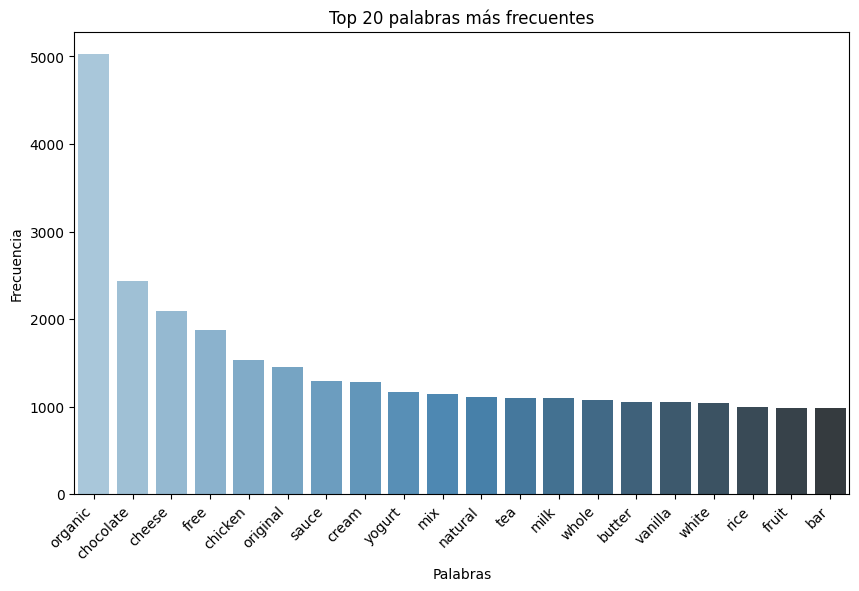

In [11]:
# Histograma de frecuencias de palabras
import seaborn as sns

# Extraemos las palabras y sus frecuencias
palabras, frecuencias = zip(*frecuencia_palabras.most_common(20))

# Visualizamos el histograma
plt.figure(figsize=(10, 6))
sns.barplot(x=list(palabras), y=list(frecuencias), palette='Blues_d')
plt.xticks(rotation=45, ha='right')
plt.title('Top 20 palabras más frecuentes')
plt.xlabel('Palabras')
plt.ylabel('Frecuencia')
plt.show()


<ipython-input-14-4167f44517a2>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=trigramas_str, y=list(frecuencias_trigramas), palette='PuBuGn_d')


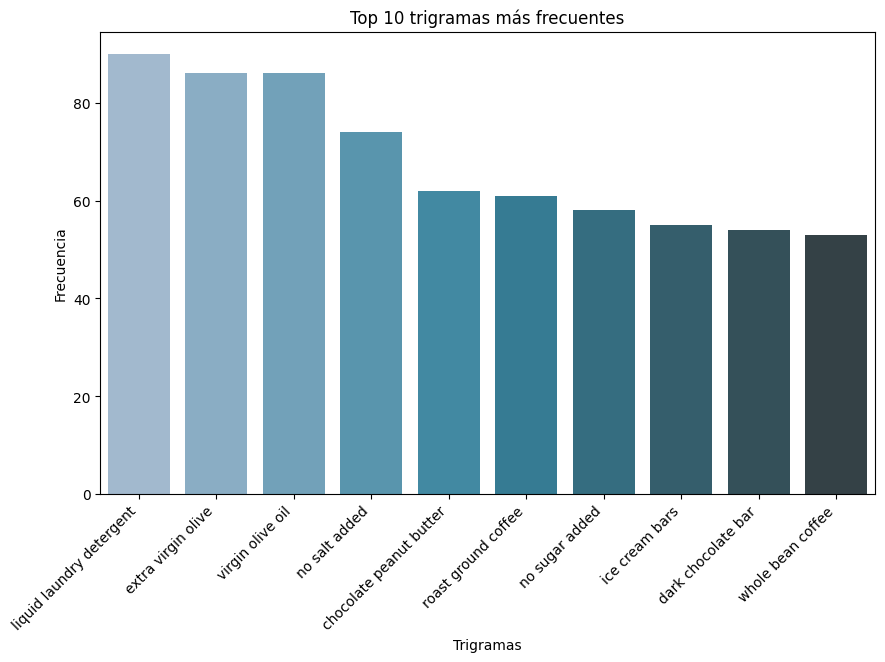

In [14]:
# Convertimos los trigramas a cadenas de texto
trigramas_str = [' '.join(tri) for tri in trigramas]

# Visualizamos el histograma de trigramas
plt.figure(figsize=(10, 6))
sns.barplot(x=trigramas_str, y=list(frecuencias_trigramas), palette='PuBuGn_d')
plt.xticks(rotation=45, ha='right')
plt.title('Top 10 trigramas más frecuentes')
plt.xlabel('Trigramas')
plt.ylabel('Frecuencia')
plt.show()
